In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [276]:
from google.colab import auth

# Will collect your credentials
auth.authenticate_user()

from google.cloud import bigquery


project_id = "project id" # add project id from big query
dataset="tiller"

client = bigquery.Client(project=project_id)


tables = [project_id+"."+dataset+'.order_data',
          project_id+"."+dataset+'.order_line',
          project_id+"."+dataset+'.payment_data',
          project_id+"."+dataset+'.store_data']
temp = []

for table in tables:
    # DataFrame
    query = f"SELECT * FROM `{table}`"
    temp.append(client.query(query).to_dataframe())
    df= client.query(query).to_dataframe()

# **store Data Exploration:**

In [29]:
df_stores = temp[3]
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id_store      21 non-null     Int64              
 1   date_created  21 non-null     datetime64[us, UTC]
 2   dim_zipcode   21 non-null     object             
 3   dim_country   21 non-null     object             
 4   dim_currency  21 non-null     object             
dtypes: Int64(1), datetime64[us, UTC](1), object(3)
memory usage: 989.0+ bytes


In [30]:
# adding two columns to df_stores store type and service type.
df = pd.DataFrame([[351, "S21", "Cafe/Bistro", "Full Service"],
       [360,"S1", "Restaurant", "Full Service"],
       [730, "S2", "Restaurant", "Full Service"],
       [1513, "S3", "Restaurant", "Full Service"],
       [2035, "S4", "Cafe/Bistro", "Full Service"],
       [4151, "S5", "Bar", "Fast Service"],
       [4196, "S6", "Restaurant", "Full Service"],
       [4364, "S7", "Restaurant", "Fast Service"],
       [4803,"S8", "Cafe/Bistro", "Fast Service"],
       [5210, "S9", "Cafe/Bistro", "Full Service"],
       [5281, "S10", "Cafe/Bistro", "Full Service"],
       [5498, "S11", "Restaurant", "Full Service"],
       [5617, "S12", "Bar", "Fast Service"],
       [5860, "S13", "Restaurant", "Full Service"],
       [6008, "S14", "Flower Shop", "Fast Service"],
       [6827, "S15", "Restaurant", "Fast Service"],
       [6830, "S16", "Restaurant", "Full Service"],
       [7304, "S17", "Cafe/Bistro", "Full Service"],
       [7786, "S18", "Coffee Shop", "Fast Service"],
       [7872, "S19", "Bar", "Fast Service"],
       [8291, "S20", "Cafe/Bistro", "Fast Service"]], columns = ["id_store","store_id", "store_type", "service_type"])
df

,id_store,store_id,store_type,service_type
0,351,S21,Cafe/Bistro,Full Service
1,360,S1,Restaurant,Full Service
2,730,S2,Restaurant,Full Service
3,1513,S3,Restaurant,Full Service
4,2035,S4,Cafe/Bistro,Full Service
5,4151,S5,Bar,Fast Service
6,4196,S6,Restaurant,Full Service
7,4364,S7,Restaurant,Fast Service
8,4803,S8,Cafe/Bistro,Fast Service
9,5210,S9,Cafe/Bistro,Full Service


In [31]:
df_stores =pd.merge(df_stores, df, on=["id_store"], how="inner")
df_stores

,id_store,date_created,dim_zipcode,dim_country,dim_currency,store_id,store_type,service_type
0,360,2015-07-29 06:54:50+00:00,75001,FR,EUR,S1,Restaurant,Full Service
1,351,2015-07-25 11:51:52+00:00,75002,FR,EUR,S21,Cafe/Bistro,Full Service
2,4803,2017-10-04 13:56:31+00:00,75002,FR,EUR,S8,Cafe/Bistro,Fast Service
3,4364,2017-06-27 12:27:31+00:00,75003,FR,EUR,S7,Restaurant,Fast Service
4,5281,2017-12-08 11:09:59+00:00,75004,FR,EUR,S10,Cafe/Bistro,Full Service
5,7872,2018-09-25 16:04:17+00:00,75005,FR,EUR,S19,Bar,Fast Service
6,8291,2018-11-12 08:28:37+00:00,75008,FR,EUR,S20,Cafe/Bistro,Fast Service
7,7304,2018-07-08 15:21:37+00:00,75008,FR,EUR,S17,Cafe/Bistro,Full Service
8,6827,2018-05-11 10:08:10+00:00,75009,FR,EUR,S15,Restaurant,Fast Service
9,5498,2017-12-29 16:14:24+00:00,75009,FR,EUR,S11,Restaurant,Full Service


In [32]:
store_type_counts = pd.DataFrame(df_stores.groupby(['store_type'])['service_type'].value_counts()).reset_index()
store_type_counts

,store_type,service_type,count
0,Bar,Fast Service,3
1,Cafe/Bistro,Full Service,5
2,Cafe/Bistro,Fast Service,2
3,Coffee Shop,Fast Service,1
4,Flower Shop,Fast Service,1
5,Restaurant,Full Service,7
6,Restaurant,Fast Service,2


In [33]:
# Count of each store type
#store_type_counts = df_stores.groupby(['store_type'])['service_type'].value_counts().reset_index()
#store_type_counts

# Plot a bar chart using Plotly Express
#fig = px.bar(store_type_counts, x='store_type', y='count', color='store_type',
            # labels={'store_type': 'Store Type', 'count': 'Count'},
            # title='Count of Store Types')
#fig.update_layout(xaxis_title='Store Type', yaxis_title='Count',width=600)
#fig.show()

In [37]:
# Plot a stacked bar chart using Plotly Express with custom colors
fig = px.bar(store_type_counts, x='store_type', y='count', color='service_type',
             labels={'store_type': 'Store Type', 'count': 'Count'},
             title='Count of Store Types by Service Type',
             barmode='stack',  # Set the barmode to 'stack' for stacked bars
             text='count',  # Specify the column to be used as data labels
             color_discrete_map={'dine-in': 'orange', 'take-away': 'purple'},  # Set custom colors
             width=700)

# Set the font size and position of the data labels
fig.update_traces(textfont_size=16, textposition='inside')  # Set the font size and position

fig.update_layout(xaxis_title='Store Type', yaxis_title='Count')
fig.show()

# **Ordar_data Exploration:**

In [38]:
df_orders = temp[0]
df_orders.head()

,id_order,id_store,id_table,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price
0,49208645,6008,<NA>,10990,11065,2018-11-16 16:43:54+00:00,2018-11-16 16:56:15+00:00,CLOSED,Tiller iPAD,1,9.90,9.90
1,19691004,2035,30578,2752,5949,2018-01-20 18:23:38+00:00,2018-01-20 19:08:46+00:00,CLOSED,Tiller iPAD,2,47.85,47.85
2,21385338,2035,19448,2753,5949,2018-02-15 11:53:42+00:00,2018-02-15 12:45:43+00:00,CLOSED,Tiller iPAD,5,111.10,111.10
3,3672152,2035,32141,2753,3063,2016-11-05 19:44:31+00:00,2016-11-05 19:45:04+00:00,CLOSED,None,0,1.20,1.20
4,98674338,6008,<NA>,10990,<NA>,2019-10-18 15:10:03+00:00,2019-10-18 15:10:11+00:00,CLOSED,tiller-order,1,29.00,29.00


In [39]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   id_order        1281148 non-null  Int64              
 1   id_store        1281148 non-null  Int64              
 2   id_table        200520 non-null   Int64              
 3   id_waiter       1191047 non-null  Int64              
 4   id_device       1272279 non-null  Int64              
 5   date_opened     1281148 non-null  datetime64[us, UTC]
 6   date_closed     1281148 non-null  datetime64[us, UTC]
 7   dim_status      1281148 non-null  object             
 8   dim_source      1224389 non-null  object             
 9   m_nb_customer   1281148 non-null  Int64              
 10  m_cached_payed  1281148 non-null  float64            
 11  m_cached_price  1281148 non-null  float64            
dtypes: Int64(6), datetime64[us, UTC](2), float64(2), object(

In [40]:
df_orders.isnull().sum()

id_order                0
id_store                0
id_table          1080628
id_waiter           90101
id_device            8869
date_opened             0
date_closed             0
dim_status              0
dim_source          56759
m_nb_customer           0
m_cached_payed          0
m_cached_price          0
dtype: int64

In [41]:
df_orders["id_order"].nunique()

1281148

In [42]:
# adding 'dim_zipcode','store_type','service_type' from df_stores to df_orders:
df_orders = pd.merge(df_orders,df_stores[['id_store', 'dim_zipcode','store_type','service_type']], on=["id_store"], how="left")
df_orders.head(3)

,id_order,id_store,id_table,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,dim_zipcode,store_type,service_type
0,49208645,6008,<NA>,10990,11065,2018-11-16 16:43:54+00:00,2018-11-16 16:56:15+00:00,CLOSED,Tiller iPAD,1,9.90,9.90,75016,Flower Shop,Fast Service
1,19691004,2035,30578,2752,5949,2018-01-20 18:23:38+00:00,2018-01-20 19:08:46+00:00,CLOSED,Tiller iPAD,2,47.85,47.85,75010,Cafe/Bistro,Full Service
2,21385338,2035,19448,2753,5949,2018-02-15 11:53:42+00:00,2018-02-15 12:45:43+00:00,CLOSED,Tiller iPAD,5,111.10,111.10,75010,Cafe/Bistro,Full Service


In [43]:
#Paris is divided into 20 districts. Each of them has a unique code 75001, 75002, ..., 75019, 75020.
# number of orders placed for each district.
#add store district to df_orders:
df_orders.groupby(["dim_zipcode"])["id_order"].count().sort_values(ascending=False)

dim_zipcode
75012    871415
75004    127765
75008     59073
75002     32723
75010     30639
75009     24053
75015     22741
75018     22027
75016     18553
75013     17708
75003     13219
75020     13137
75001     12223
75019     10506
75005      5366
Name: id_order, dtype: int64

In [44]:
df_orders_dist = pd.DataFrame(df_orders.groupby(["dim_zipcode","id_store"])["id_order"].count().sort_values(ascending=False)).reset_index()
df_orders_dist

,dim_zipcode,id_store,id_order
0,75012,4151,871415
1,75004,5281,127765
2,75008,8291,54048
3,75010,2035,30639
4,75015,1513,22741
5,75016,6008,18553
6,75002,4803,18029
7,75018,5617,17467
8,75009,6827,14770
9,75002,351,14694


In [45]:
# Create treemap with custom_data to store total count
fig = px.treemap(df_orders_dist, path=[px.Constant("all"), 'dim_zipcode', 'id_store'],
                 values='id_order', color='dim_zipcode', custom_data=['id_order'])

# Calculate total count
total_count = df_orders_dist['id_order'].sum()

# Calculate percentage of total for each segment
percentage = df_orders_dist['id_order'] / total_count * 100

# Update figure layout to display percentage labels as whole numbers
fig.update_traces(textinfo="label+value+percent root",
                 texttemplate='%{label}<br>%{value}<br>(%{percentRoot:.2f})')

# Set layout margin
fig.update_layout(margin=dict(t=50, l=25, r=25))

# Show the plot
fig.show()

In [46]:
# Create the bar chart
#fig = px.bar(df_orders_dist, x='dim_zipcode', y='id_order', title='Orders Volume by Districts')
#fig.show()

In [47]:
#df_orders.info()

In [48]:
# Convert the type of id_store column to object (string)
df_orders['id_store'] = df_orders['id_store'].astype(str)

In [51]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   id_order        1281148 non-null  Int64              
 1   id_store        1281148 non-null  object             
 2   id_table        200520 non-null   Int64              
 3   id_waiter       1191047 non-null  Int64              
 4   id_device       1272279 non-null  Int64              
 5   date_opened     1281148 non-null  datetime64[us, UTC]
 6   date_closed     1281148 non-null  datetime64[us, UTC]
 7   dim_status      1281148 non-null  object             
 8   dim_source      1224389 non-null  object             
 9   m_nb_customer   1281148 non-null  Int64              
 10  m_cached_payed  1281148 non-null  float64            
 11  m_cached_price  1281148 non-null  float64            
 12  dim_zipcode     1281148 non-null  object             
 1

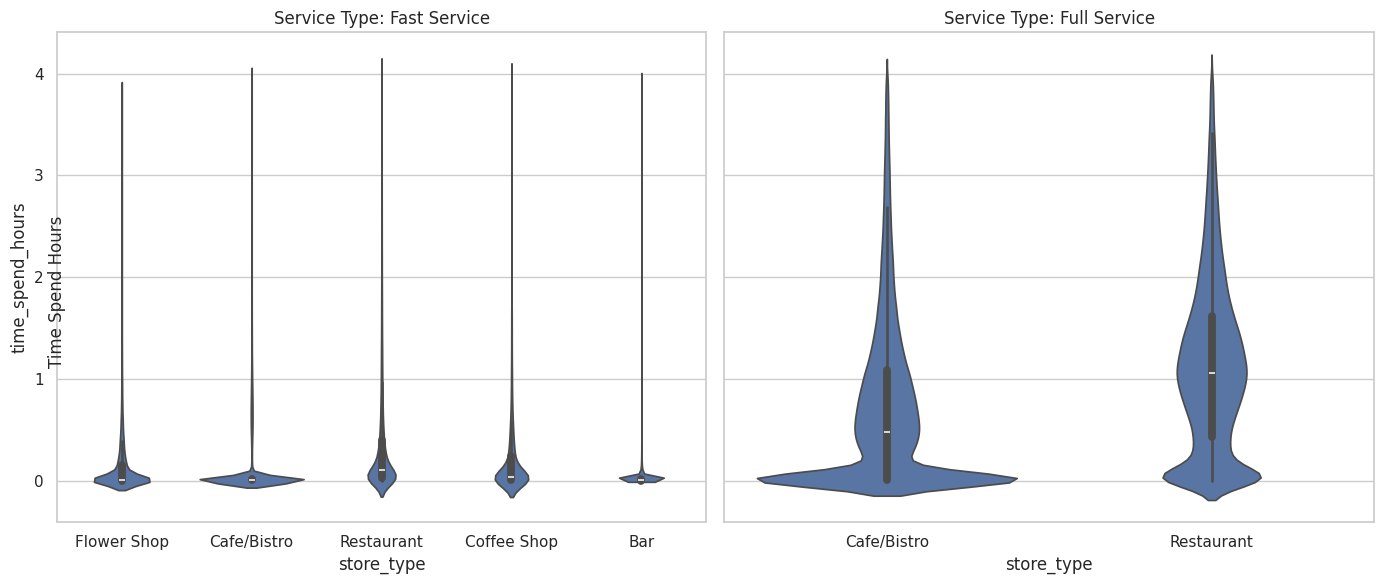

In [76]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with two subplots, one for each service_type
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Iterate over each service_type and create a violin plot on the corresponding subplot
for idx, service_type in enumerate(df_orders_hours["service_type"].unique()):
    sns.violinplot(data=df_orders_hours[df_orders_hours["service_type"] == service_type],
                   x="store_type", y="time_spend_hours", ax=axes[idx])
    axes[idx].set_title(f"Service Type: {service_type}")

# Add a common y-axis label
fig.text(0.04, 0.5, 'Time Spend Hours', va='center', rotation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [77]:
import plotly.express as px

# Plot a stacked bar chart using Plotly Express with custom colors
fig = px.bar(store_type_counts, x='store_type', y='count', color='service_type',
             labels={'store_type': 'Store Type', 'count': 'Count'},
             title='Count of Store Types by Service Type',
             barmode='stack',  # Set the barmode to 'stack' for stacked bars
             text='count',  # Specify the column to be used as data labels
             color_discrete_map={'dine-in': 'orange', 'take-away': 'purple'},  # Set custom colors
             width=700)

# Set the font size and position of the data labels
fig.update_traces(textfont_size=16, textposition='inside')  # Set the font size and position

fig.update_layout(xaxis_title='Store Type', yaxis_title='Count')
fig.show()

In [78]:
# Filter the DataFrame for the current year and the past year
current_year = 2020
past_year = current_year - 1
df_filtered = df_orders[df_orders['year'].isin([current_year, past_year]) & (df_orders["id_store"] != "351")]

# Group by store and year, and calculate the total sales
df1 = df_filtered.groupby(['id_store', 'year']).agg(total_sales=('m_cached_payed', 'sum')).reset_index()

# Filter for the current year and the past year
df_current_year = df1[df1['year'] == current_year]
df_past_year = df1[df1['year'] == past_year]

# Merge the data for the current year and the past year
df_merged = pd.merge(df_current_year, df_past_year, on='id_store', suffixes=('_current_year', '_past_year'), how='outer')

# Create the bar chart using Plotly Express
fig = px.bar(df_merged, x='id_store', y=['total_sales_past_year', 'total_sales_current_year'],
             color_discrete_map={'total_sales_past_year': '#E193DE', 'total_sales_current_year': '#6F016C'},
             labels={'value': 'Total Sales', 'variable': 'Year'},
             title='Total Sales Comparison: Current Year vs Past Year by Store',barmode='group')
fig.update_layout(xaxis_title='Store', yaxis_title='Total Sales')
fig.show()

In [79]:
# add weekdays column
df_orders['day_of_week'] = df_orders['date_opened'].dt.day_name()
df_orders['day_of_week'].unique()

array(['Friday', 'Saturday', 'Thursday', 'Monday', 'Wednesday', 'Tuesday',
       'Sunday'], dtype=object)

In [80]:
# add coloumn is_weekend with 1 if it is saturday or sunday and 0 otherwise:
df_orders["is_weekend"]=0
df_orders.loc[(df_orders["day_of_week"]=="Saturday") | (df_orders["day_of_week"]=="Sunday") , "is_weekend"] = 1
df_orders["is_weekend"].unique()

array([0, 1])

In [81]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   id_order              1281148 non-null  Int64              
 1   id_store              1281148 non-null  object             
 2   id_table              200520 non-null   Int64              
 3   id_waiter             1191047 non-null  Int64              
 4   id_device             1272279 non-null  Int64              
 5   date_opened           1281148 non-null  datetime64[us, UTC]
 6   date_closed           1281148 non-null  datetime64[us, UTC]
 7   dim_status            1281148 non-null  object             
 8   dim_source            1224389 non-null  object             
 9   m_nb_customer         1281148 non-null  Int64              
 10  m_cached_payed        1281148 non-null  float64            
 11  m_cached_price        1281148 non-nul

In [82]:
#orders count when id_table is missing for each store:
df_orders[(df_orders["id_table"].isnull())].groupby(["id_store", "store_type","service_type"])["id_order"].count().sort_values(ascending=False)

id_store  store_type   service_type
4151      Bar          Fast Service    871415
8291      Cafe/Bistro  Fast Service     54048
5281      Cafe/Bistro  Full Service     51021
6008      Flower Shop  Fast Service     18553
4803      Cafe/Bistro  Fast Service     17717
5617      Bar          Fast Service     17467
6827      Restaurant   Fast Service     14770
4364      Restaurant   Fast Service      6764
7786      Coffee Shop  Fast Service      6333
7872      Bar          Fast Service      5344
351       Cafe/Bistro  Full Service      5160
2035      Cafe/Bistro  Full Service      3812
5498      Restaurant   Full Service      2082
730       Restaurant   Full Service      1964
7304      Cafe/Bistro  Full Service      1433
360       Restaurant   Full Service       921
5860      Restaurant   Full Service       836
6830      Restaurant   Full Service       635
1513      Restaurant   Full Service       325
4196      Restaurant   Full Service        22
5210      Cafe/Bistro  Full Service         

In [83]:
# view for store id ==1513 when id_table is null
df_orders[(df_orders["id_store"]==1513) & (df_orders["id_table"].isnull()) & (df_orders["m_nb_customer"]==1)]#.drop(columns=["date_date","Holiday Name","French Name","Comments","year","Type","day_of_week","service_type","store_type"])

,id_order,id_store,id_table,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,...,m_cached_price,dim_zipcode,store_type,service_type,m_payed_per_customer,time_spend,time_spend_hours,year,day_of_week,is_weekend


In [84]:
# orders count when id_waiter is missing for each store:
df_orders[(df_orders["id_waiter"].isnull())].groupby("id_store")["id_order"].count().sort_values(ascending=False)

id_store
5281    83180
7872     4359
8291     1596
360       290
1513      256
5498      238
5617      101
6830       33
4196       21
2035       18
351         4
6827        4
4151        1
Name: id_order, dtype: int64

In [85]:
# number of waiters in each restaurant
df_orders.groupby("id_store")["id_waiter"].nunique().sort_values(ascending=False)

id_store
6827    5
5498    4
5617    4
7786    4
6830    4
6008    4
4364    4
8291    3
4151    3
351     3
5210    2
5281    2
2035    2
4803    2
5860    2
4196    2
360     2
730     2
7304    2
7872    2
1513    2
Name: id_waiter, dtype: int64

In [86]:
# number of orders distributed among waiters for each restuarant:(power_bi)
#df_orders.groupby(["id_store", "id_waiter"])["id_order"].count()

In [87]:
# number of orders distributed among waiters for each restuarant:(power_bi)
#df_orders.groupby(["id_store", "id_waiter"])["id_order"].count()

In [88]:
df_orders.describe()

,id_order,id_table,id_waiter,id_device,m_nb_customer,m_cached_payed,m_cached_price,m_payed_per_customer,time_spend,time_spend_hours,year,is_weekend
count,1281148.0,200520.0,1191047.0,1272279.0,1281148.0,1.281148e+06,1.281148e+06,1281148.0,1281148,1.281148e+06,1.281148e+06,1.281148e+06
mean,68657138.696059,75008.32705,7395.079607,11457.894959,1.212623,1.582795e+01,1.583014e+01,11.270705,0 days 00:19:35.938900,3.266497e-01,2.018681e+03,3.687474e-01
std,37164725.79438,50707.441506,3365.401319,3235.026571,0.795931,4.104557e+01,4.105216e+01,26.037963,0 days 07:41:15.280068,7.687578e+00,8.585041e-01,4.824655e-01
min,218270.0,3199.0,461.0,128.0,1.0,-5.910000e+02,-5.910000e+02,-591.0,-1 days +21:34:56,-2.417778e+00,2.015000e+03,0.000000e+00
25%,36820396.25,19443.0,6607.0,10625.0,1.0,3.000000e+00,3.000000e+00,2.2,0 days 00:00:12,3.333333e-03,2.018000e+03,0.000000e+00
50%,67046620.5,86485.0,6607.0,12567.0,1.0,8.910000e+00,8.910000e+00,8.0,0 days 00:00:33,9.166667e-03,2.019000e+03,0.000000e+00
75%,95124621.75,106792.0,6643.0,12568.0,1.0,1.730000e+01,1.730000e+01,15.075,0 days 00:01:49,3.027778e-02,2.019000e+03,1.000000e+00
max,150531828.0,318734.0,27245.0,25379.0,230.0,7.164000e+03,7.164000e+03,7164.0,132 days 15:29:45,3.183496e+03,2.020000e+03,1.000000e+00


In [89]:
#total number of orders when number of customer == 0
df_orders[(df_orders["m_nb_customer"] == 0)]["id_order"].count()

0

In [90]:
#total number of orders when number of customer == 0 & and amount payed == 0
df_orders[(df_orders["m_nb_customer"] == 0) & (df_orders["m_cached_payed"] == 0)]["id_order"].count()

0

In [91]:
# list of stores in the data:
df_orders["id_store"].unique()

array(['6008', '2035', '730', '351', '6830', '1513', '8291', '6827',
       '4364', '5210', '360', '7304', '7786', '5498', '7872', '4196',
       '4803', '5860', '5617', '5281', '4151'], dtype=object)

In [92]:
# for each id_store and for each number of customers group, show the average sales
# we want to see the averge sales per customer to know with what value should we replace 0.
for id in df_orders["id_store"].unique():
  print(df_orders[(df_orders["id_store"] == id)].groupby(["m_nb_customer"])["m_cached_payed"].mean().sort_values(ascending=False).tail(10))

m_nb_customer
1    26.334177
Name: m_cached_payed, dtype: float64
m_nb_customer
11    243.837097
9     225.275000
8     195.513717
7     176.229167
6     155.201800
5     125.924075
4     100.335981
3      73.023329
2      48.752626
1      16.696863
Name: m_cached_payed, dtype: float64
m_nb_customer
8     165.051613
7     156.124576
6     123.987607
5     107.841667
4      88.949496
3      68.203376
2      44.620764
1      24.019463
47     15.500000
31     10.500000
Name: m_cached_payed, dtype: float64
m_nb_customer
10    259.182222
8     228.241379
7     198.262887
6     170.281008
5     137.842936
4     109.815462
3      82.973727
22     62.000000
2      55.931956
1      36.221297
Name: m_cached_payed, dtype: float64
m_nb_customer
11    180.300000
6     155.022308
8     147.764375
7     146.050000
5     128.356522
9     108.000000
3      73.463725
4      69.496999
2      54.202631
1      39.733323
Name: m_cached_payed, dtype: float64
m_nb_customer
10    217.036667
9     190.130937
8 

In [93]:
# Replace 0 by 1 when number of customers == 0
df_orders["m_nb_customer"] = df_orders["m_nb_customer"].replace(0, 1)

In [94]:
df_orders["m_nb_customer"].describe()

count    1281148.0
mean      1.212623
std       0.795931
min            1.0
25%            1.0
50%            1.0
75%            1.0
max          230.0
Name: m_nb_customer, dtype: Float64

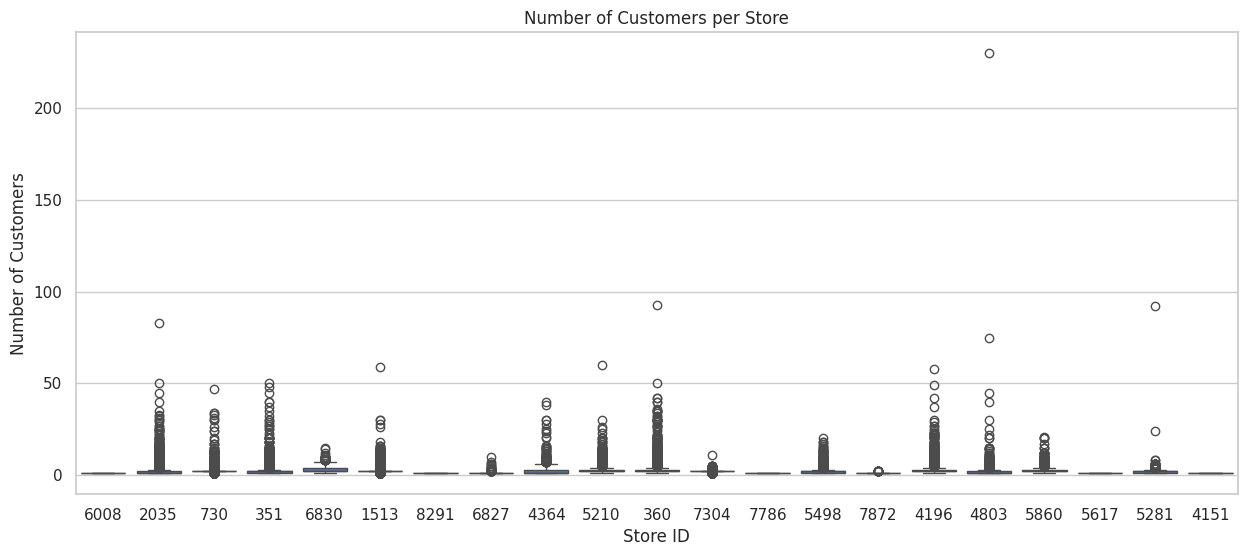

In [95]:
# show the m_nb_customer data distribution using hist and boxplot:
# Create the boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x='id_store', y='m_nb_customer', data=df_orders)

# Set labels and title
plt.xlabel('Store ID')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Store')

# Show the plot
plt.show()

In [96]:
# show the discribtive statistcs for total sales = m_cached_payed
df_orders["m_cached_payed"].groupby(df_orders["id_store"]).describe()

,count,mean,std,min,25%,50%,75%,max
id_store,,,,,,,,
1513,22741.0,47.978553,41.501820,0.0,25.55,39.90,58.75,2527.00
2035,30639.0,36.099324,63.376384,0.0,7.00,20.00,46.55,3320.00
351,14694.0,67.250752,86.437261,0.0,29.00,53.05,78.50,2994.70
360,12223.0,95.494514,125.161211,0.0,46.00,69.00,108.00,3780.00
4151,871415.0,7.034955,11.405142,-591.0,-1.00,6.00,12.00,1898.10
4196,4173.0,190.159976,192.114695,0.0,102.00,145.00,216.90,4658.50
4364,13219.0,84.659912,205.841560,0.0,16.00,44.50,89.00,7164.00
4803,18029.0,26.187789,34.433725,0.0,13.00,24.00,31.00,3305.00
5210,13137.0,61.718153,52.091954,0.0,34.00,50.10,75.90,1652.40


In [97]:
df_orders["m_payed_per_customer"]=df_orders["m_cached_payed"]/df_orders["m_nb_customer"]

In [98]:
df_orders["m_payed_per_customer"].groupby(df_orders["id_store"]).describe()

,count,mean,std,min,25%,50%,75%,max
id_store,,,,,,,,
1513,22741.0,22.480782,14.297253,0.0,14.5,20.25,27.175,511.85
2035,30639.0,19.253355,26.723003,0.0,7.0,16.1,25.85,2089.0
351,14694.0,30.372703,49.879549,0.0,18.333333,27.0,33.666667,2994.7
360,12223.0,30.728546,27.611106,0.0,22.0,28.466667,37.2,2000.0
4151,871415.0,7.034955,11.405142,-591.0,-1.0,6.0,12.0,1898.1
4196,4173.0,61.690467,48.863806,0.0,45.0,55.5,71.25,2783.0
4364,13219.0,51.604297,174.3876,0.0,10.0,21.25,48.5,7164.0
4803,18029.0,18.280158,13.47827,0.0,12.0,13.0,20.0,337.0
5210,13137.0,24.475798,11.807634,0.0,17.75,22.425,29.75,586.55


In [99]:
# add column = time_spend per order:
# calculate the time spend per order:
df_orders["time_spend"]= df_orders["date_closed"] - df_orders["date_opened"]
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   id_order              1281148 non-null  Int64              
 1   id_store              1281148 non-null  object             
 2   id_table              200520 non-null   Int64              
 3   id_waiter             1191047 non-null  Int64              
 4   id_device             1272279 non-null  Int64              
 5   date_opened           1281148 non-null  datetime64[us, UTC]
 6   date_closed           1281148 non-null  datetime64[us, UTC]
 7   dim_status            1281148 non-null  object             
 8   dim_source            1224389 non-null  object             
 9   m_nb_customer         1281148 non-null  Int64              
 10  m_cached_payed        1281148 non-null  float64            
 11  m_cached_price        1281148 non-nul

In [100]:
#show discribtive statistics for time spend for each store:
df_orders[["time_spend","id_store"]].groupby("id_store").describe()

time_spend                                                  \
              count                    mean                     std   
id_store                                                              
1513          22741  0 days 02:41:23.389868  0 days 04:08:07.558692   
2035          30639  0 days 00:56:28.220666  0 days 01:03:36.601477   
351           14694  0 days 01:14:25.812508  0 days 03:07:57.989911   
360           12223  0 days 02:50:16.750061  1 days 01:03:27.591935   
4151         871415  0 days 00:00:58.935304  0 days 00:13:40.275720   
4196           4173  0 days 03:48:24.660915  2 days 18:35:42.078420   
4364          13219  0 days 01:07:37.476738  0 days 06:25:26.463324   
4803          18029  0 days 00:26:05.593876  0 days 00:47:08.555687   
5210          13137  0 days 02:34:40.075207  0 days 05:03:44.719895   
5281         127765  0 days 00:39:20.948358  0 days 01:15:30.739350   
5498           9283  0 days 03:10:48.013465  1 days 05:37:06.174608   
5617          17467  0 days 01:05:14.393313  1 days 13:32:19.824091   
5860           4560  0 days 01:00:54.617543  0 days 01:57:35.755511   
6008          18553  0 days 00:20:25.846655  0 days 09:36:31.121095   
6827          14770  0 days 00:54:01.361272  0 days 06:20:57.970373   
6830           7696  0 days 01:07:44.443607  0 days 06:20:40.102921   
730           10012  0 days 01:11:31.236616  0 days 05:22:44.394338   
7304           5025  0 days 00:52:13.036815  0 days 01:03:43.942729   
7786           6333  0 days 00:58:27.455550  1 days 18:45:06.746177   
7872           5366  0 days 00:04:58.076407  0 days 00:34:23.576972   
8291          54048  0 days 00:00:43.210461  0 days 00:12:12.266588   

                                                                             \
                        min                     25%                     50%   
id_store                                                                      
1513        0 days 00:00:05         0 days 00:42:39         0 days 01:17:35   
2035      -1 days +23:38:33         0 days 00:02:49         0 days 00:45:43   
351         0 days 00:00:00         0 days 00:03:41         0 days 00:40:35   
360         0 days 00:00:00         0 days 01:03:39         0 days 01:27:15   
4151      -1 days +23:59:21         0 days 00:00:09         0 days 00:00:25   
4196        0 days 00:00:05         0 days 00:26:00         0 days 00:57:54   
4364      -1 days +21:34:56         0 days 00:01:39         0 days 00:11:08   
4803        0 days 00:00:01         0 days 00:01:00         0 days 00:07:33   
5210        0 days 00:00:01         0 days 00:52:23         0 days 01:23:21   
5281        0 days 00:00:00         0 days 00:00:31         0 days 00:20:43   
5498      -1 days +23:59:59         0 days 00:00:55         0 days 00:29:31   
5617        0 days 00:00:00         0 days 00:00:04         0 days 00:00:33   
5860        0 days 00:00:05  0 days 00:04:01.750000  0 days 00:49:39.500000   
6008        0 days 00:00:03         0 days 00:00:07         0 days 00:00:29   
6827      -1 days +23:56:17         0 days 00:01:41         0 days 00:05:24   
6830        0 days 00:00:00         0 days 00:03:25         0 days 00:31:22   
730         0 days 00:00:05         0 days 00:39:48         0 days 01:04:27   
7304        0 days 00:00:04         0 days 00:34:13         0 days 00:49:21   
7786        0 days 00:00:00         0 days 00:00:40         0 days 00:02:26   
7872        0 days 00:00:01         0 days 00:00:05         0 days 00:00:08   
8291      -1 days +23:46:26         0 days 00:00:13         0 days 00:00:20   

                                                     
                             75%                max  
id_store                                             
1513             0 days 02:26:00    2 days 00:30:03  
2035             0 days 01:18:10    1 days 04:05:04  
351       0 days 01:38:17.750000    4 days 19:51:20  
360              0 days 02:04:56   66 days 06:05:07  
4151             0 days 00:00

In [101]:
# Convert timedelta to hours and add in a new column
df_orders['time_spend_hours'] = df_orders['time_spend'].dt.total_seconds() / 3600
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   id_order              1281148 non-null  Int64              
 1   id_store              1281148 non-null  object             
 2   id_table              200520 non-null   Int64              
 3   id_waiter             1191047 non-null  Int64              
 4   id_device             1272279 non-null  Int64              
 5   date_opened           1281148 non-null  datetime64[us, UTC]
 6   date_closed           1281148 non-null  datetime64[us, UTC]
 7   dim_status            1281148 non-null  object             
 8   dim_source            1224389 non-null  object             
 9   m_nb_customer         1281148 non-null  Int64              
 10  m_cached_payed        1281148 non-null  float64            
 11  m_cached_price        1281148 non-nul

In [102]:
df_orders_hours=df_orders[(df_orders['time_spend_hours']<4) & (df_orders['time_spend_hours']>0)]

In [103]:
fig = px.box(df_orders_hours, x="store_type", y="time_spend_hours", color="service_type", notched=True)
fig.show()

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.violinplot(data=df_orders_hours, x="service_type", y="time_spend_hours")

# Add title and labels
plt.title("Violin Plot of Time Spend Hours by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Time Spend Hours")

# Show the plot
plt.show()

In [ ]:
df_orders[(df_orders["time_spend"] <="0 days 01:00:00") & (df_orders["id_store"] !=4151)].groupby(["id_store"])["id_order"].count().sort_values(ascending=False)

In [ ]:
#the distribution of the data among stores:
df_orders.groupby(["id_store"])["id_order"].count()/df_orders["id_order"].count()*100

In [ ]:
#add year column to df_orders
df_orders["year"] = df_orders['date_opened'].dt.year

In [ ]:
# data available for each store per year
df_orders.groupby(["id_store","year"])["id_order"].count().sort_values(ascending=False)

In [111]:
#import folium

# Paris coordinates
#paris_coordinates = [48.8566, 2.3522]

# Create a map centered around Paris
#map_paris = folium.Map(location=paris_coordinates, zoom_start=12)

#folium.Choropleth(
    #geo_data='https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson',  # Path to GeoJSON file containing Paris zip code boundaries
    #data=df_orders_dist,  # DataFrame containing zip code data, including order volume
    #columns=['dim_zipcode', 'id_order'],  # Columns from DataFrame to use
    #key_on='feature.properties.code',  # Key in GeoJSON file for zip code
    #fill_color='YlGn',  # Fill color for the choropleth map
    #fill_opacity=0.7,  # Fill opacity
    #line_opacity=0.2,  # Line opacity
    #legend_name='Order Volume',  # Legend title
#).add_to(map_paris)

# Display the map
#map_paris


In [112]:
#read fr_holidays data and adding it to df_orders:
df_holidays = pd.read_csv("/content/fr_holidays.csv")
df_holidays

,DateYear,Year,Day,Date,Holiday Name,French Name,Type,Comments
0,2015-01-01,2015,Thursday,Jan 01,New Year's Day,Jour de l'an,Public Holiday,NaN
1,2015-04-03,2015,Friday,Apr 03,Good Friday,Vendredi saint,Regional Holiday,Alsace and Moselle
2,2015-04-06,2015,Monday,Apr 06,Easter Monday,Lundi de Pâques,Public Holiday,NaN
3,2015-05-01,2015,Friday,May 01,Labour Day,Fête du Travail,Public Holiday,International Workers' Day
4,2015-05-08,2015,Friday,May 08,V-E Day,La fête de la victoire,Public Holiday,NaN
...,...,...,...,...,...,...,...,...
86,2020-08-15,2020,Saturday,Aug 15,Assumption Day,Assomption,Public Holiday,NaN
87,2020-11-01,2020,Sunday,Nov 01,All Saints' Day,Toussaint,Public Holiday,NaN
88,2020-11-11,2020,Wednesday,Nov 11,Armistice Day,Jour d'armistice,Public Holiday,NaN
89,2020-12-25,2020,Friday,Dec 25,Christmas Day,Noël,Public Holiday,NaN


In [113]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DateYear      91 non-null     object
 1   Year          91 non-null     int64 
 2   Day           91 non-null     object
 3   Date          91 non-null     object
 4   Holiday Name  91 non-null     object
 5   French Name   91 non-null     object
 6   Type          91 non-null     object
 7   Comments      49 non-null     object
dtypes: int64(1), object(7)
memory usage: 5.8+ KB


In [114]:
df_holidays['DateYear'] = pd.to_datetime(df_holidays['DateYear'])
df_holidays.head()

,DateYear,Year,Day,Date,Holiday Name,French Name,Type,Comments
0,2015-01-01,2015,Thursday,Jan 01,New Year's Day,Jour de l'an,Public Holiday,NaN
1,2015-04-03,2015,Friday,Apr 03,Good Friday,Vendredi saint,Regional Holiday,Alsace and Moselle
2,2015-04-06,2015,Monday,Apr 06,Easter Monday,Lundi de Pâques,Public Holiday,NaN
3,2015-05-01,2015,Friday,May 01,Labour Day,Fête du Travail,Public Holiday,International Workers' Day
4,2015-05-08,2015,Friday,May 08,V-E Day,La fête de la victoire,Public Holiday,NaN


In [115]:
#add date column  = date_opened with different format
df_orders["date_date"]=df_orders["date_opened"].dt.tz_convert(None)
#df_orders["date_date"]=df_orders["date_date"].dt.date
df_orders["date_date"]=df_orders["date_date"].dt.floor('D')
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   id_order              1281148 non-null  Int64              
 1   id_store              1281148 non-null  object             
 2   id_table              200520 non-null   Int64              
 3   id_waiter             1191047 non-null  Int64              
 4   id_device             1272279 non-null  Int64              
 5   date_opened           1281148 non-null  datetime64[us, UTC]
 6   date_closed           1281148 non-null  datetime64[us, UTC]
 7   dim_status            1281148 non-null  object             
 8   dim_source            1224389 non-null  object             
 9   m_nb_customer         1281148 non-null  Int64              
 10  m_cached_payed        1281148 non-null  float64            
 11  m_cached_price        1281148 non-nul

In [116]:
df_orders = pd.merge(left=df_orders, right=df_holidays, left_on='date_date', right_on='DateYear', how='left')
df_orders.head(10)

,id_order,id_store,id_table,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,...,is_weekend,date_date,DateYear,Year,Day,Date,Holiday Name,French Name,Type,Comments
0,49208645,6008,<NA>,10990,11065,2018-11-16 16:43:54+00:00,2018-11-16 16:56:15+00:00,CLOSED,Tiller iPAD,1,...,0,2018-11-16,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19691004,2035,30578,2752,5949,2018-01-20 18:23:38+00:00,2018-01-20 19:08:46+00:00,CLOSED,Tiller iPAD,2,...,1,2018-01-20,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21385338,2035,19448,2753,5949,2018-02-15 11:53:42+00:00,2018-02-15 12:45:43+00:00,CLOSED,Tiller iPAD,5,...,0,2018-02-15,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3672152,2035,32141,2753,3063,2016-11-05 19:44:31+00:00,2016-11-05 19:45:04+00:00,CLOSED,None,1,...,1,2016-11-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98674338,6008,<NA>,10990,<NA>,2019-10-18 15:10:03+00:00,2019-10-18 15:10:11+00:00,CLOSED,tiller-order,1,...,0,2019-10-18,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5705085,730,8290,1095,754,2017-02-13 18:49:08+00:00,2017-02-13 19:15:02+00:00,CLOSED,None,2,...,0,2017-02-13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5801079,2035,19443,2753,3063,2017-02-17 12:14:52+00:00,2017-02-17 13:03:52+00:00,CLOSED,None,4,...,0,2017-02-17,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,69642243,351,19307,461,128,2019-04-24 18:54:11+00:00,2019-04-24 19:04:11+00:00,CLOSED,Tiller iPAD,9,...,0,2019-04-24,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,70649595,6830,133618,12894,13026,2019-05-01 18:52:16+00:00,2019-05-01 18:54:03+00:00,CLOSED,Tiller iPAD,2,...,0,2019-05-01,2019-05-01,2019.0,Wednesday,May 01,Labour Day,Fête du Travail,Public Holiday,International Workers' Day
9,58370500,1513,15662,2464,424,2019-02-04 19:57:49+00:00,2019-02-04 20:34:25+00:00,CLOSED,Tiller iPAD,2,...,0,2019-02-04,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   id_order              1281148 non-null  Int64              
 1   id_store              1281148 non-null  object             
 2   id_table              200520 non-null   Int64              
 3   id_waiter             1191047 non-null  Int64              
 4   id_device             1272279 non-null  Int64              
 5   date_opened           1281148 non-null  datetime64[us, UTC]
 6   date_closed           1281148 non-null  datetime64[us, UTC]
 7   dim_status            1281148 non-null  object             
 8   dim_source            1224389 non-null  object             
 9   m_nb_customer         1281148 non-null  Int64              
 10  m_cached_payed        1281148 non-null  float64            
 11  m_cached_price        1281148 non-nul

In [118]:
# I why it is not 90
df_orders[(df_orders["DateYear"].notnull()) & (df_orders["Year"]==2017)].groupby(["DateYear","Holiday Name", "Type"]).size()


DateYear    Holiday Name              Type                
2017-01-01  New Year's Day            Public Holiday           11
2017-01-02  New Year's Day (in lieu)  Public Holiday           12
2017-04-14  Good Friday               Regional Holiday         78
2017-04-17  Easter Monday             Public Holiday            8
2017-05-01  Labour Day                Public Holiday           10
2017-05-08  V-E Day                   Public Holiday           11
2017-05-25  Ascension Day             Public Holiday          884
2017-05-28  Mother's Day              Not A Public Holiday    405
2017-06-05  Whit Monday               Public Holiday           10
2017-06-18  Father's Day              Not A Public Holiday    324
2017-07-14  Bastille Day              Public Holiday          436
2017-08-15  Assumption Day            Public Holiday          140
2017-11-01  All Saints' Day           Public Holiday          100
2017-11-11  Armistice Day             Public Holiday          105
2017-12-26  St. S

In [119]:
df_orders['Type'] = df_orders['Type'].fillna('Regular Day')

In [120]:
#add new coloumn is_holidays with i if true and 0 if fulse
df_orders["is_holidays"]=0
df_orders.loc[df_orders["Type"]=="Public Holiday", "is_holidays"] = 1

In [121]:
df_orders = df_orders.drop(columns=["DateYear","Year","Day","Date"])

In [122]:
df_orders["day"]=df_orders["date_opened"].dt.day

In [123]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   id_order              1281148 non-null  Int64              
 1   id_store              1281148 non-null  object             
 2   id_table              200520 non-null   Int64              
 3   id_waiter             1191047 non-null  Int64              
 4   id_device             1272279 non-null  Int64              
 5   date_opened           1281148 non-null  datetime64[us, UTC]
 6   date_closed           1281148 non-null  datetime64[us, UTC]
 7   dim_status            1281148 non-null  object             
 8   dim_source            1224389 non-null  object             
 9   m_nb_customer         1281148 non-null  Int64              
 10  m_cached_payed        1281148 non-null  float64            
 11  m_cached_price        1281148 non-nul

# **Order_line Data Exploration:**

In [124]:
df_order_line = temp[1]
df_order_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924748 entries, 0 to 3924747
Data columns (total 20 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   id_order_line             Int64              
 1   id_order                  Int64              
 2   date_opended              datetime64[us, UTC]
 3   date_created              datetime64[us, UTC]
 4   m_quantity                float64            
 5   m_unit_price              float64            
 6   m_unit_price_exc_vat      float64            
 7   m_total_price_inc_vat     float64            
 8   m_total_price_exc_vat     float64            
 9   m_tax_percent             float64            
 10  m_discount_amount         float64            
 11  dim_type                  object             
 12  dim_category              object             
 13  dim_name                  object             
 14  dim_status                object             
 15  dim_feature_typ

In [275]:
df_order_line.to_csv('order_line.csv', index=False)

In [125]:
df_order_line.head(5)

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,dim_feature_type,dim_unit_measure,dim_unit_measure_display,dim_category_translated,dim_name_translated
0,82336608,16430112,2017-11-18 13:45:42+00:00,2017-11-18 13:45:42+00:00,1.0,0.0,0.0,0.0,0.0,0.200,0.0,OPTION,Martini 15 cl,Gin,WAITING,None,None,None,Martini 15 cl,Gin
1,107444137,22210477,2018-02-26 18:58:34+00:00,2018-02-26 18:58:38+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,"Menu 25,00",Naan,IN_PROGRESS,None,None,None,"Menu 25,00",Naan
2,203147218,46076755,2018-10-20 12:21:20+00:00,2018-10-20 12:27:00+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,BRUNCH,Oeuf,IN_PROGRESS,None,None,None,BRUNCH,Egg
3,274219696,64098922,2019-03-18 11:54:47+00:00,2019-03-18 11:57:24+00:00,1.0,0.0,0.0,0.0,0.0,0.055,0.0,PRODUCT,CAFE / THE,THÉ,IN_PROGRESS,None,None,None,CAFE / THE,TEA
4,334734131,79014428,2019-06-24 10:09:42+00:00,2019-06-24 10:09:46+00:00,1.0,0.0,0.0,0.0,0.0,0.055,0.0,PRODUCT,CAFE / THE,THÉ,IN_PROGRESS,None,None,None,CAFE / THE,TEA


In [126]:
df_order_line.isna().sum()

id_order_line                     0
id_order                          0
date_opended                      0
date_created                      0
m_quantity                        0
m_unit_price                      0
m_unit_price_exc_vat              0
m_total_price_inc_vat             0
m_total_price_exc_vat             0
m_tax_percent                     0
m_discount_amount                 0
dim_type                          0
dim_category                      0
dim_name                          0
dim_status                        0
dim_feature_type            3528920
dim_unit_measure            3670078
dim_unit_measure_display    3670078
dim_category_translated           0
dim_name_translated               0
dtype: int64

In [127]:
df_order_line['dim_feature_type'].unique()

array([None, 'Boutique', 'SOLIDE', 'Restauration', 'Restaurant',
       'Accessoires', 'Bar à café', 'Boissons alcoolisées', 'LIQUIDE',
       'Boissons sans alcool', 'Formation', 'Café en grains', 'Take away',
       'Épicerie fine', 'Livres', 'PRODUIT'], dtype=object)

In [128]:
print(len(df_order_line['dim_feature_type']))
df_order_line['dim_feature_type'].value_counts()

3924748


dim_feature_type
Bar à café              170699
Restaurant               53762
Restauration             45088
SOLIDE                   38263
Café en grains           31479
Take away                28290
LIQUIDE                  14140
Boissons sans alcool      7992
Épicerie fine             1949
Boutique                  1465
Accessoires               1181
Boissons alcoolisées       662
Formation                  338
PRODUIT                    301
Livres                     219
Name: count, dtype: int64

In [129]:
mask = df_order_line['m_quantity'] <1
df_order_line[mask] = 1

In [130]:
df_order_line['m_quantity'].sort_values(ascending = True)

0            1.0
2603908      1.0
2603909      1.0
2603910      1.0
2603911      1.0
           ...  
2177865    364.0
1627867    380.0
3568120    500.0
1100752    575.0
820401     591.0
Name: m_quantity, Length: 3924748, dtype: float64

In [131]:
df_order_line.loc[df_order_line['dim_name_translated'] == 'DISCOUNT', 'dim_name_translated'] = 'Product return'

df_order_line.loc[df_order_line['dim_name'] == 'DISCOUNT', 'dim_name'] = 'Retour produit'

In [132]:
df_order_line[df_order_line['dim_name_translated'] =='DISCOUNT']

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,dim_feature_type,dim_unit_measure,dim_unit_measure_display,dim_category_translated,dim_name_translated


In [133]:
#add store id to df_order_line:
df_order_line = pd.merge(df_order_line, df_orders[['id_order','id_store']], on=["id_order"], how="left")
df_order_line = df_order_line.drop(columns = ["dim_feature_type","dim_unit_measure","dim_unit_measure_display"])
df_order_line.head(10)

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,dim_category_translated,dim_name_translated,id_store
0,82336608,16430112,2017-11-18 13:45:42+00:00,2017-11-18 13:45:42+00:00,1.0,0.0,0.0,0.0,0.0,0.200,0.0,OPTION,Martini 15 cl,Gin,WAITING,Martini 15 cl,Gin,1513
1,107444137,22210477,2018-02-26 18:58:34+00:00,2018-02-26 18:58:38+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,"Menu 25,00",Naan,IN_PROGRESS,"Menu 25,00",Naan,730
2,203147218,46076755,2018-10-20 12:21:20+00:00,2018-10-20 12:27:00+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,BRUNCH,Oeuf,IN_PROGRESS,BRUNCH,Egg,4803
3,274219696,64098922,2019-03-18 11:54:47+00:00,2019-03-18 11:57:24+00:00,1.0,0.0,0.0,0.0,0.0,0.055,0.0,PRODUCT,CAFE / THE,THÉ,IN_PROGRESS,CAFE / THE,TEA,4803
4,334734131,79014428,2019-06-24 10:09:42+00:00,2019-06-24 10:09:46+00:00,1.0,0.0,0.0,0.0,0.0,0.055,0.0,PRODUCT,CAFE / THE,THÉ,IN_PROGRESS,CAFE / THE,TEA,4803
5,9091971,2230540,2016-08-02 18:12:21+00:00,2016-08-02 18:12:43+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,Boissons chaudes,Thé,IN_PROGRESS,Hot drinks,Tea,1513
6,84069065,16807424,2017-11-25 22:26:38+00:00,2017-11-25 22:41:01+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,Boissons,Thé,IN_PROGRESS,Drinks,Tea,1513
7,23950110,4996373,2017-01-13 22:04:09+00:00,2017-01-13 22:04:20+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,Boissons,Thé,IN_PROGRESS,Drinks,Tea,1513
8,9489642,2329859,2016-08-12 11:25:46+00:00,2016-08-12 11:26:13+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,Boissons chaudes,Thé,IN_PROGRESS,Hot drinks,Tea,1513
9,83740749,16739911,2017-11-24 20:10:47+00:00,2017-11-24 20:10:52+00:00,1.0,0.0,0.0,0.0,0.0,0.100,0.0,PRODUCT,Boissons,Thé,IN_PROGRESS,Drinks,Tea,1513


In [134]:
df_category = pd.DataFrame(df_order_line.groupby("id_store")["dim_category_translated"].nunique().sort_values(ascending=False)).reset_index()
df_category["id_store"]= df_category["id_store"].astype(str)

In [274]:
# Plot a bar chart using Plotly Express
fig = px.bar(df_category, x='id_store', y='dim_category_translated',
             labels={'id_store': 'Store', 'dim_category_translated': 'Number of Categories'}, color_discrete_sequence=['purple'],
             title='Number of Categories by Store', text='dim_category_translated')
fig.update_layout(xaxis_title='Store', yaxis_title='Number of Categories')
fig.show()

In [136]:
df_order_line[(df_order_line["id_store"]==1513)].groupby("dim_name_translated").agg({"m_unit_price":"mean","m_quantity":"sum"}).sort_values(by="m_unit_price", ascending=False)

,m_unit_price,m_quantity
dim_name_translated,,


## **Payments Data Exploration:**

In [137]:
df_payments = temp[2]
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403213 entries, 0 to 1403212
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   id_pay        1403213 non-null  Int64              
 1   id_order      1403213 non-null  Int64              
 2   dim_status    1403213 non-null  object             
 3   dim_type      1403213 non-null  object             
 4   m_amount      1403213 non-null  float64            
 5   m_cashback    1403197 non-null  float64            
 6   m_credit      1403197 non-null  float64            
 7   date_created  1403213 non-null  datetime64[us, UTC]
dtypes: Int64(2), datetime64[us, UTC](1), float64(3), object(2)
memory usage: 88.3+ MB


In [138]:
# the distribution  of orders per payment method :
df_payments.groupby(["dim_type"])["id_pay"].count().sort_values(ascending=False)#.head(10)

dim_type
CARD                       728607
CASH                       615195
TICKET_RESTAURANT           36557
FIVORY                       7436
CREDIT_NOTE                  5574
CB_Sans_Contact              3832
SUMUP                        1382
BANK_CHECK                   1099
VOUCHER                       963
AMERICAN_EXPRESS              772
CB_SANS_CONTACT               697
BANK_TRANSFER                 241
DELIVEROO                     227
UBER EATS                     175
CARTE TICKET RESTAURANT       155
CARTE_TICKET_RESTAURANT       104
SIOUPLAIT                      50
ALLORESTO                      45
TAB                            33
AUTRES                         15
Ticket_Restaurant_carte        15
POURBOIRE_CARTE_BLEUE          10
CLICKEAT                        7
RESTO_FLASH                     4
APPLE PAY                       4
CB_TICKET_RESTO                 3
alipay                          3
avoir_encaissé                  2
LIVRAISON                       2
CARTE




# **Describtive Analysis for Store = 1513:**

In [196]:
df_orders_1513= df_orders[(df_orders["id_store"]=="1513")]

In [197]:
df_orders_1513.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22741 entries, 9 to 1276739
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id_order              22741 non-null  Int64              
 1   id_store              22741 non-null  object             
 2   id_table              22416 non-null  Int64              
 3   id_waiter             22485 non-null  Int64              
 4   id_device             21257 non-null  Int64              
 5   date_opened           22741 non-null  datetime64[us, UTC]
 6   date_closed           22741 non-null  datetime64[us, UTC]
 7   dim_status            22741 non-null  object             
 8   dim_source            15080 non-null  object             
 9   m_nb_customer         22741 non-null  Int64              
 10  m_cached_payed        22741 non-null  float64            
 11  m_cached_price        22741 non-null  float64            
 12  dim_zip

In [198]:
# add a column based on _id_table if it is null the order type is take away
df_orders_1513["order_type"] = "Reservation"
df_orders_1513.loc[(df_orders_1513["id_table"].isnull()), "order_type"] = "Take_away"
df_orders_1513.loc[(df_orders_1513["id_table"].notnull()) & (df_orders_1513["time_spend"] <= "0 days 00:05:00") , "order_type"] = "Up-front"
df_orders_1513.loc[(df_orders_1513["id_table"].notnull()) & (df_orders_1513["time_spend"] > "0 days 00:05:00") & (df_orders_1513["time_spend"] <= "0 days 02:45:00") , "order_type"] = "Dinning-in"
df_orders_1513["order_type"].value_counts()

<ipython-input-198-3ceb3911d1dd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



order_type
Dinning-in     16509
Reservation     4810
Up-front        1097
Take_away        325
Name: count, dtype: int64

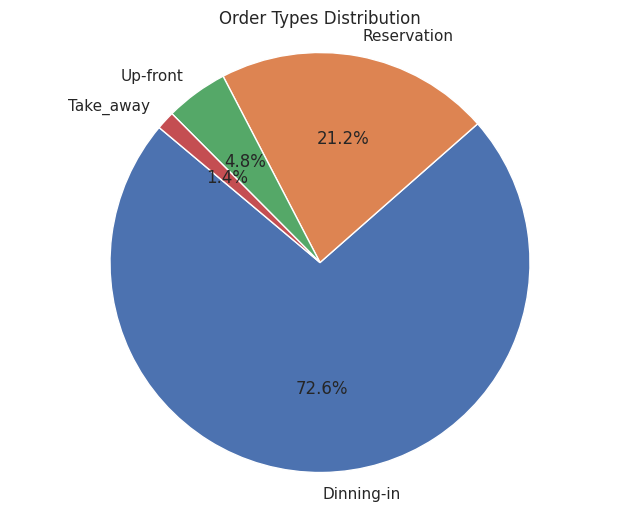

In [199]:
# plot the counts of orders by order type
order_type_counts = df_orders_1513["order_type"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(order_type_counts, labels=order_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Types Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [200]:
# numbers of tables in this restaurant:
df_orders_1513.groupby(["year"])["id_table"].nunique()

year
2016    30
2017    31
2018    30
2019    31
2020    31
Name: id_table, dtype: int64

<Axes: xlabel='m_cached_payed', ylabel='Count'>

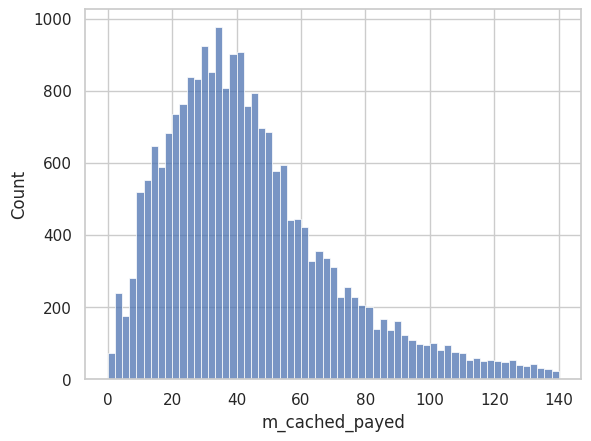

In [266]:
sns.histplot(data=df_orders[(df_orders["id_store"]=="1513") & (df_orders["m_cached_payed"]<=140)]["m_cached_payed"])

In [202]:
df_orders[(df_orders["id_store"]=="1513") & (df_orders["m_cached_payed"]<=150)].shape[0]/df_orders[(df_orders["id_store"]=="1513")].shape[0]

0.9793764566202015

In [203]:
df_order_1513 = df_orders[(df_orders["id_store"] == "1513") &
                          (df_orders["m_cached_payed"]<= 200) &
                          (df_orders["time_spend_hours"] <= 18) &
                          (df_orders["year"] < 2020)]

In [204]:
df_order_1513.shape

(19750, 28)

In [205]:
df_order_1513.describe()

,id_order,id_table,id_waiter,id_device,m_nb_customer,m_cached_payed,m_cached_price,m_payed_per_customer,time_spend,time_spend_hours,year,is_weekend,date_date,is_holidays,day
count,19750.0,19457.0,19497.0,18280.0,19750.0,19750.000000,19750.000000,19750.0,19750,19750.000000,19750.000000,19750.000000,19750,19750.000000,19750.000000
mean,32082318.925671,15876.90091,2461.882751,424.0,2.175342,46.604974,46.619987,22.105257,0 days 02:07:56.916202,2.132477,2017.520759,0.341975,2018-01-15 11:28:03.888607,0.026228,15.781165
min,956931.0,15653.0,2034.0,424.0,1.0,0.000000,0.000000,0.0,0 days 00:00:05,0.001389,2016.000000,0.000000,2016-04-05 00:00:00,0.000000,1.000000
25%,5668326.0,15661.0,2464.0,424.0,2.0,25.900000,25.900000,14.5,0 days 00:39:15,0.654167,2017.000000,0.000000,2017-02-11 00:00:00,0.000000,8.000000
50%,17112506.0,15669.0,2464.0,424.0,2.0,40.025000,40.050000,20.190625,0 days 01:10:38,1.177222,2017.000000,0.000000,2017-12-02 00:00:00,0.000000,16.000000
75%,54864834.5,15687.0,2464.0,424.0,2.0,58.900000,58.900000,27.0,0 days 02:04:56.750000,2.082431,2019.000000,1.000000,2019-01-06 00:00:00,0.000000,23.000000
max,110816298.0,17042.0,2464.0,424.0,15.0,199.800000,199.800000,179.5,0 days 17:51:24,17.856667,2019.000000,1.000000,2019-12-31 00:00:00,1.000000,31.000000
std,32515820.776364,491.595757,30.099513,0.0,1.124436,30.696336,30.687542,12.371793,0 days 02:58:40.615792,2.977949,1.086911,0.474383,NaN,0.159816,8.786132


In [206]:
#df_orders_1513[(df_orders_1513["m_cached_payed"]>150)]

<ipython-input-273-d9689f2687ac>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




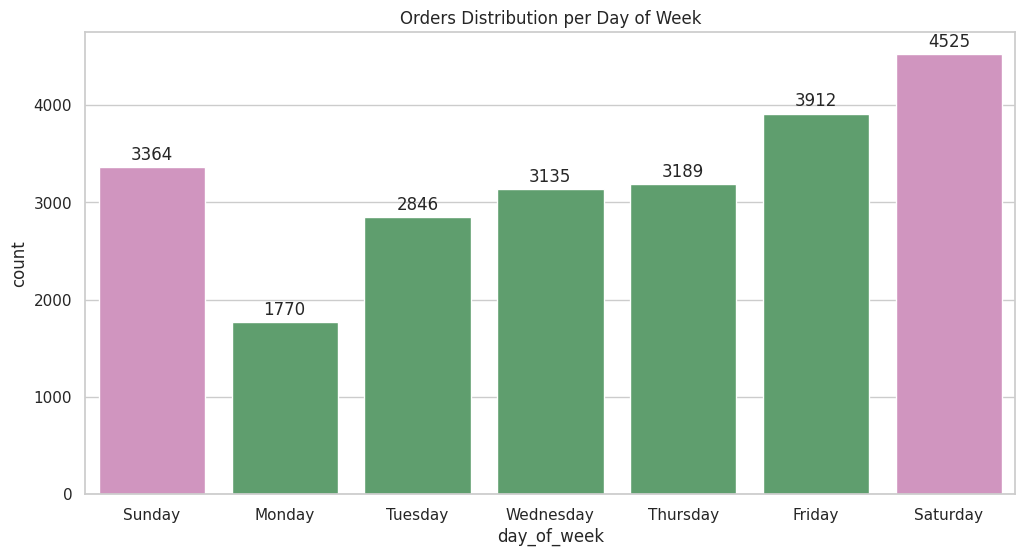

In [273]:
# Define the order of the days of the week
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Define the color palette
pal1 = [sns.color_palette()[6], sns.color_palette()[2], sns.color_palette()[2], sns.color_palette()[2],
        sns.color_palette()[2], sns.color_palette()[2], sns.color_palette()[6]]

# Create the countplot with the specified order
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_orders_1513, x='day_of_week', order=day_order, palette=pal1)
plt.title('Orders Distribution per Day of Week')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

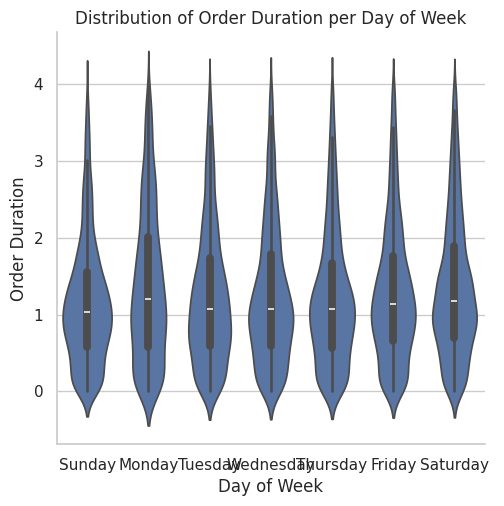

In [208]:
df_orders_1513_d=df_orders_1513[(df_orders_1513["time_spend_hours"]<=4)]
# Define the order of the days of the week
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the violin plot using catplot
sns.catplot(data=df_orders_1513_d, x='day_of_week', y='time_spend_hours', kind='violin', order=day_order)

# Set plot labels and title
plt.xlabel('Day of Week')
plt.ylabel('Order Duration')
plt.title('Distribution of Order Duration per Day of Week')

# Show the plot
plt.show()


# **Correlation Analysis -  A\B Testing - ML Modeling:**

In [209]:
# create a dataframe containing the variables to focus on in the Ab testing and ML model:
df_grouped = pd.DataFrame(df_orders_1513.groupby(["year", "date_date","is_weekend", "is_holidays"]).agg({
    "id_order": "count",
    "m_nb_customer": "sum",
    "time_spend_hours": "mean",
    "m_cached_payed": "sum"
    #"id_table": "distinct_count"
})).reset_index()
df_grouped = df_grouped.rename(columns={'id_order': 'nb_orders','id_table': 'nb_tables_occ' })
df_grouped["m_payed_per_customer"]=df_grouped["m_cached_payed"]/df_grouped["m_nb_customer"]
#df_grouped["daily_tables_occupancy"] = 0
#df_grouped["daily_tables_occupancy"] = df_grouped.loc[(df_grouped["order_type"]=="Dinning_in"), "daily_tables_occupancy"] = df_grouped["id_table"].nunique()/31
#df_grouped

In [210]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  1618 non-null   int32         
 1   date_date             1618 non-null   datetime64[us]
 2   is_weekend            1618 non-null   int64         
 3   is_holidays           1618 non-null   int64         
 4   nb_orders             1618 non-null   int64         
 5   m_nb_customer         1618 non-null   Int64         
 6   time_spend_hours      1618 non-null   float64       
 7   m_cached_payed        1618 non-null   float64       
 8   m_payed_per_customer  1618 non-null   Float64       
dtypes: Float64(1), Int64(1), datetime64[us](1), float64(2), int32(1), int64(3)
memory usage: 110.7 KB


In [211]:
df_grouped.describe()

,year,date_date,is_weekend,is_holidays,nb_orders,m_nb_customer,time_spend_hours,m_cached_payed,m_payed_per_customer
count,1618.000000,1618,1618.000000,1618.000000,1618.000000,1618.0,1618.000000,1618.000000,1618.0
mean,2017.981459,2018-07-01 18:51:10.457354,0.286156,0.030284,14.055006,30.855377,3.169703,674.338863,22.263446
min,2016.000000,2016-04-05 00:00:00,0.000000,0.000000,1.000000,1.0,0.185833,7.870000,0.973684
25%,2017.000000,2017-05-14 06:00:00,0.000000,0.000000,9.000000,19.0,1.074867,397.550000,19.247341
50%,2018.000000,2018-06-23 12:00:00,0.000000,0.000000,13.000000,28.0,1.928725,606.425000,21.675744
75%,2019.000000,2019-08-04 18:00:00,1.000000,0.000000,18.000000,40.0,3.441525,861.137500,24.749419
max,2020.000000,2020-11-18 00:00:00,1.000000,1.000000,41.000000,125.0,39.243819,2843.050000,70.65
std,1.324206,NaN,0.452103,0.171421,6.702629,17.077113,3.871247,389.006834,4.963168


In [212]:
df_grouped=df_grouped[(df_grouped["year"]< 2020)]
#df_grouped=df_grouped[(df_grouped["m_cached_payed"]<=1000)]
#df_grouped=df_grouped[(df_grouped["time_spend_hours"]<=4)]
#df_grouped.describe()

In [213]:
# Creating corrilation Matrix:
df_corr = df_grouped.corr()
df_corr

,year,date_date,is_weekend,is_holidays,nb_orders,m_nb_customer,time_spend_hours,m_cached_payed,m_payed_per_customer
year,1.000000,0.966540,0.000297,-0.005046,-0.139860,-0.126587,0.436471,-0.163980,-0.127947
date_date,0.966540,1.000000,0.002565,-0.009027,-0.149512,-0.130701,0.446405,-0.175738,-0.149503
is_weekend,0.000297,0.002565,1.000000,-0.037829,0.300514,0.369660,0.032131,0.371430,0.023764
is_holidays,-0.005046,-0.009027,-0.037829,1.000000,-0.049849,-0.034489,0.002918,-0.031261,-0.009285
nb_orders,-0.139860,-0.149512,0.300514,-0.049849,1.000000,0.935864,-0.238995,0.876494,-0.119399
m_nb_customer,-0.126587,-0.130701,0.369660,-0.034489,0.935864,1.000000,-0.220375,0.941137,-0.116748
time_spend_hours,0.436471,0.446405,0.032131,0.002918,-0.238995,-0.220375,1.000000,-0.244167,-0.092259
m_cached_payed,-0.163980,-0.175738,0.371430,-0.031261,0.876494,0.941137,-0.244167,1.000000,0.179063
m_payed_per_customer,-0.127947,-0.149503,0.023764,-0.009285,-0.119399,-0.116748,-0.092259,0.179063,1.000000


<Axes: >

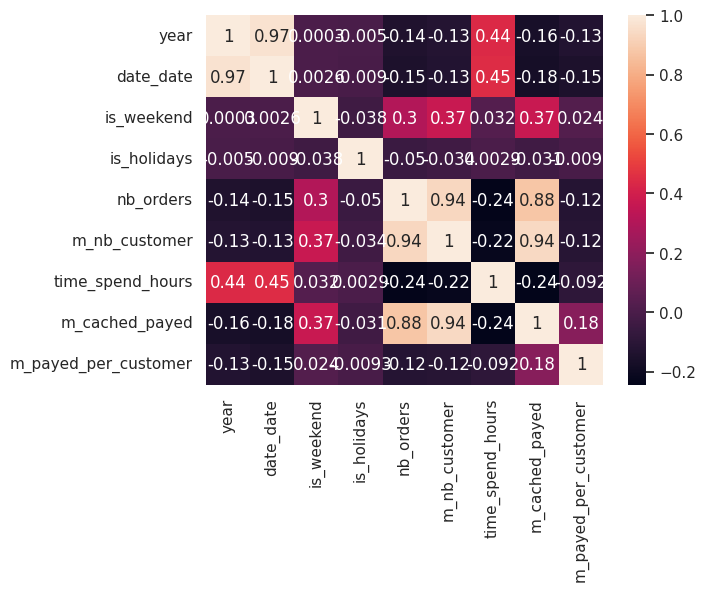

In [214]:
sns.heatmap(df_corr, annot=True)

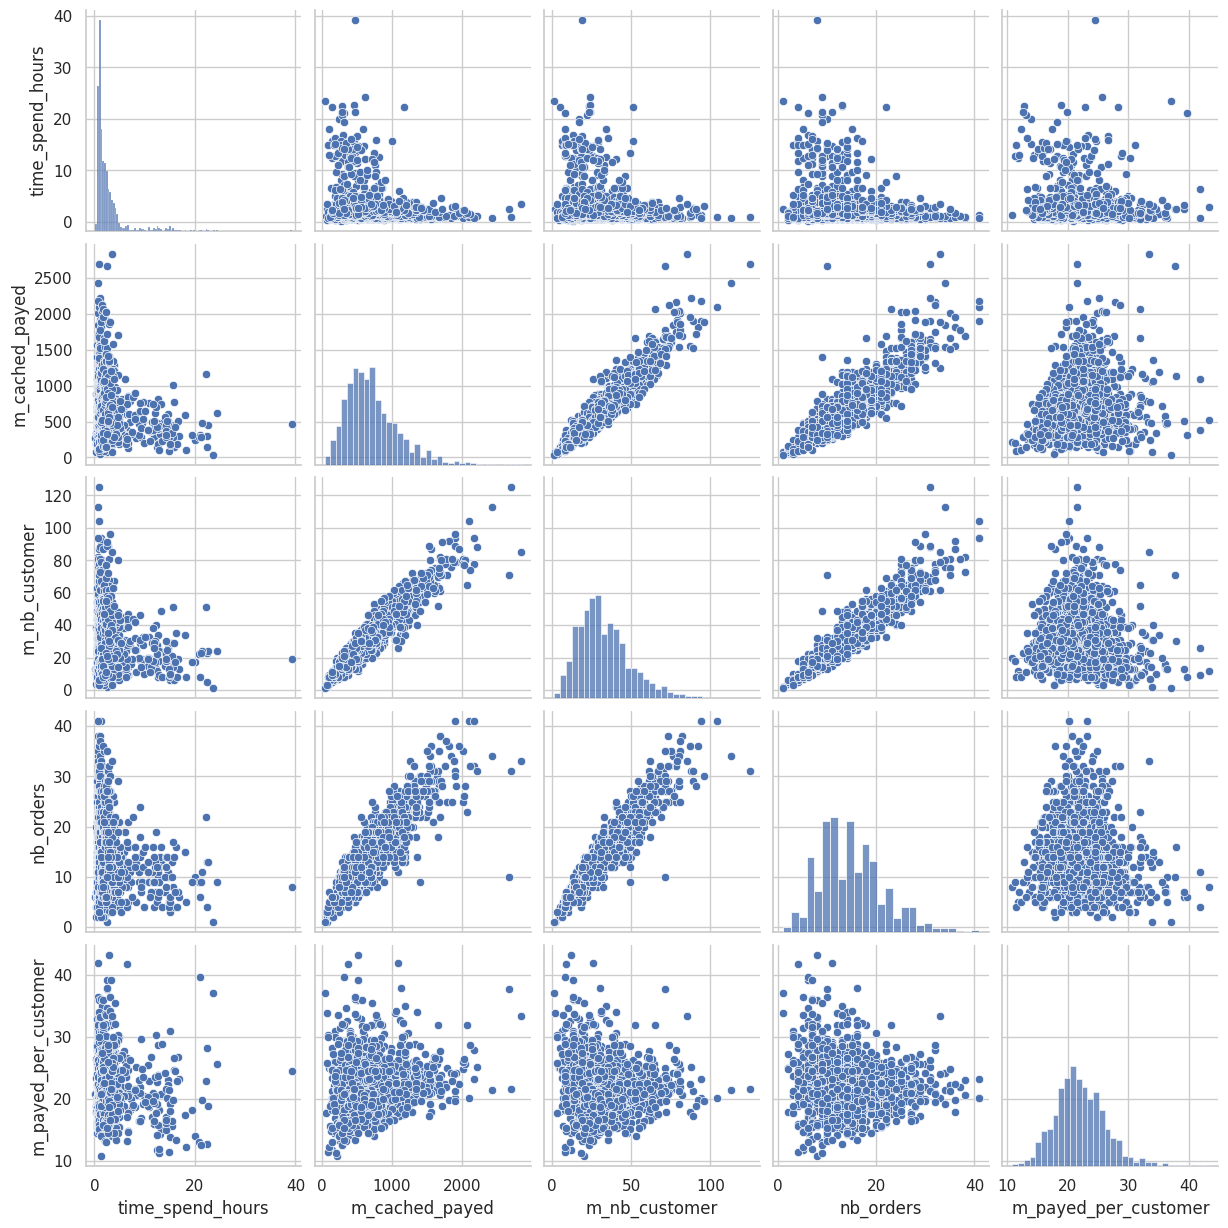

In [215]:
# Create a pair plot using seaborn
sns.pairplot(df_grouped, vars=['time_spend_hours', 'm_cached_payed', 'm_nb_customer', 'nb_orders', 'm_payed_per_customer'])

# Add regression lines
plt.show()

In [216]:
# Filter columns with numerical data types
#numeric_columns = df_grouped.select_dtypes(include=['int', 'float']).columns

# Create a separate histogram for each numerical column
#for column in numeric_columns:
    #fig = px.histogram(df_grouped, x=column, title=f'Histogram of {column}')
    #fig.show()

# **A/B Testing:**
### **1a- Is there a difference in *average sales* of holidays vs regular-days?**
###    

*   H0: there is no differece.
*   H1: there is difference.



In [217]:

#df_isholidays = pd.DataFrame(df_orders_1513.groupby(["is_holidays","date_date"])["m_cached_payed"].sum()).reset_index()
#df_isholidays

In [218]:
df_grouped.groupby(["is_holidays"])["m_cached_payed"].mean()

is_holidays
0    722.848894
1    652.961429
Name: m_cached_payed, dtype: float64

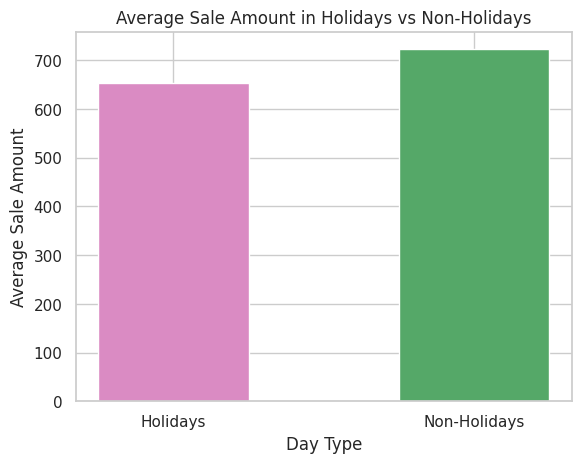

In [272]:
# Calculate average sale for holidays and non-holidays
avg_sale_holidays = df_grouped[df_grouped['is_holidays']==1]['m_cached_payed'].mean()
avg_sale_non_holidays = df_grouped[df_grouped['is_holidays']==0]['m_cached_payed'].mean()
# Define the width of the bars
bar_width = 0.5
#defining colors:
colors = [sns.color_palette()[6], sns.color_palette()[2]]
# Plot a bar chart
plt.bar(['Holidays', 'Non-Holidays'], [avg_sale_holidays, avg_sale_non_holidays], color=colors, width=bar_width)
plt.xlabel('Day Type')
plt.ylabel('Average Sale Amount')
plt.title('Average Sale Amount in Holidays vs Non-Holidays')
plt.show()

In [220]:
import numpy as np
import scipy.stats as stats

In [221]:
t_score, p_value = stats.ttest_ind(a=df_grouped[(df_grouped["is_holidays"]==0)]["m_cached_payed"],b=df_grouped[(df_grouped["is_holidays"]==1)]["m_cached_payed"],equal_var=True)
print(f'p-value:{p_value}')

p-value:0.2489423891639219



## ***Since p-value > 5% level of segnificant, then we accept the null hypothesis and say that there is no difference in the average of sales between holidays and other days. i.e there is no effect of holidays on sales.***


### **1b- Is there a difference in *Average number of orders* of Holidays vs Reguler-days?**
###    

*   H0: there is no differece.
*   H1: there is difference.

In [222]:
df_grouped.groupby(["is_holidays"])["nb_orders"].mean()

is_holidays
0    14.864394
1    12.952381
Name: nb_orders, dtype: float64

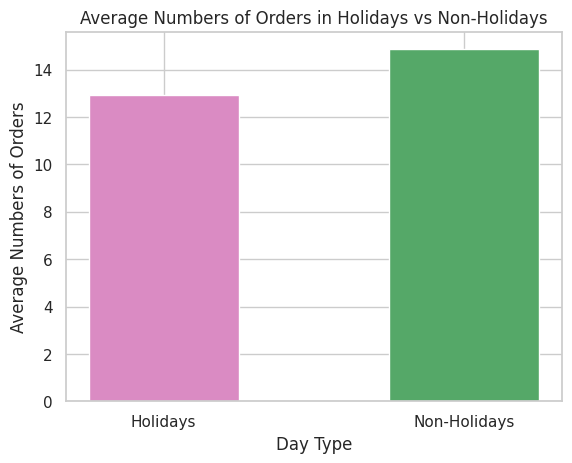

In [271]:
# Calculate average numbers of orders for holidays and non-holidays
avg_nb_orders_holidays = df_grouped[df_grouped['is_holidays']==1]['nb_orders'].mean()
avg_nb_orders_non_holidays = df_grouped[df_grouped['is_holidays']==0]['nb_orders'].mean()
# Define the width of the bars
bar_width = 0.5
# Define colors for bars
colors = [sns.color_palette()[6], sns.color_palette()[2]]
# Plot a bar chart
plt.bar(['Holidays', 'Non-Holidays'], [avg_nb_orders_holidays, avg_nb_orders_non_holidays],color=colors, width=bar_width)
plt.xlabel('Day Type')
plt.ylabel('Average Numbers of Orders')
plt.title('Average Numbers of Orders in Holidays vs Non-Holidays')
plt.show()

In [224]:
t_score, p_value = stats.ttest_ind(a=df_grouped[(df_grouped["is_holidays"]==0)]["nb_orders"],b=df_grouped[(df_grouped["is_holidays"]==1)]["nb_orders"],equal_var=True)
print(f'p-value:{p_value}')

p-value:0.06589572211410323



## ***Since p-value > 5% level of segnificant, then we accept the null hypothesis and say that there is no difference in the average of number of orders between holidays and other days. ***

### **1c- Is there a difference in *Average Number of Customers* of Holidays vs Reguler-days?**
###    

*   H0: there is no differece.
*   H1: there is difference.

In [225]:
df_grouped.groupby(["is_holidays"])["m_nb_customer"].mean()

is_holidays
0    33.056061
1    29.690476
Name: m_nb_customer, dtype: Float64

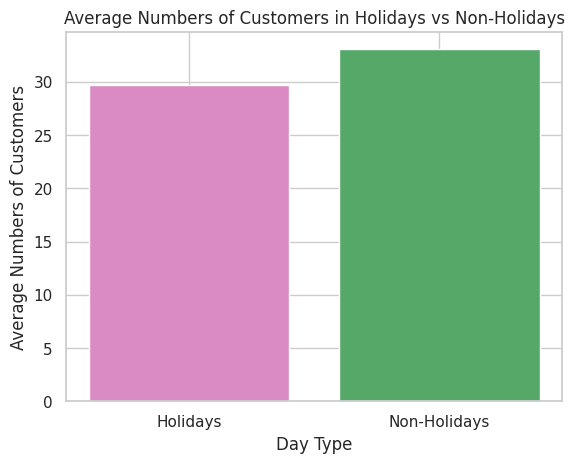

In [270]:
# Calculate average numbers of orders for holidays and non-holidays
avg_nb_customers_holidays = df_grouped[df_grouped['is_holidays']==1]['m_nb_customer'].mean()
avg_nb_customers_non_holidays = df_grouped[df_grouped['is_holidays']==0]['m_nb_customer'].mean()
# Define colors for bars
colors = [sns.color_palette()[6], sns.color_palette()[2]]
# Plot a bar chart
plt.bar(['Holidays', 'Non-Holidays'], [avg_nb_customers_holidays, avg_nb_customers_non_holidays],color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Numbers of Customers')
plt.title('Average Numbers of Customers in Holidays vs Non-Holidays')
plt.show()

In [227]:
df_grouped[(df_grouped["is_holidays"]==1)]["m_nb_customer"]

26      39
30      54
33      24
41      29
100     48
132     38
210     36
220     55
264     21
271     28
272     12
377     14
391     17
398     17
415     24
426     17
465     46
497     35
575     44
585     80
635     17
726     11
755     15
762     16
764     14
775      8
829     19
861     15
938     39
948     34
991     23
998     39
1108    18
1117    54
1124    29
1146    32
1157    10
1191    24
1223    30
1301    96
1311    15
1355    11
Name: m_nb_customer, dtype: Int64

In [228]:
df_grouped.dtypes

year                             int32
date_date               datetime64[us]
is_weekend                       int64
is_holidays                      int64
nb_orders                        int64
m_nb_customer                    Int64
time_spend_hours               float64
m_cached_payed                 float64
m_payed_per_customer           Float64
dtype: object

In [229]:
df_grouped.isnull().sum()

year                    0
date_date               0
is_weekend              0
is_holidays             0
nb_orders               0
m_nb_customer           0
time_spend_hours        0
m_cached_payed          0
m_payed_per_customer    0
dtype: int64

In [230]:
df_grouped["m_nb_customer"].value_counts().sum()

1362

In [231]:
df_grouped["m_nb_customer"]=df_grouped["m_nb_customer"].astype('int64')

In [232]:
df_grouped.dtypes

year                             int32
date_date               datetime64[us]
is_weekend                       int64
is_holidays                      int64
nb_orders                        int64
m_nb_customer                    int64
time_spend_hours               float64
m_cached_payed                 float64
m_payed_per_customer           Float64
dtype: object

In [233]:
t_score, p_value = stats.ttest_ind(a=df_grouped[(df_grouped["is_holidays"]==0)]["m_nb_customer"],b=df_grouped[(df_grouped["is_holidays"]==1)]["m_nb_customer"],equal_var=True)
print(f'p-value:{p_value}')

p-value:0.20336504608190495



### **2a- Is there a difference in *average sales* of Weekends vs Weekdays?**
###    

*   H0: there is no differece.
*   H1: there is difference.

In [234]:
#df_isweekend = pd.DataFrame(df_orders_1513.groupby(["is_weekend","date_date"])["m_cached_payed"].sum()).reset_index()
#df_isweekend

In [235]:
df_grouped.groupby(["is_weekend"])["m_cached_payed"].mean()

is_weekend
0    629.764156
1    947.318359
Name: m_cached_payed, dtype: float64

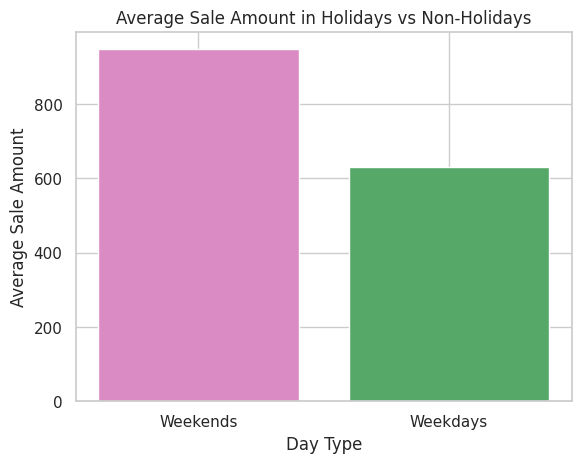

In [269]:
# Calculate average sale for holidays and non-holidays
avg_sale_weekends = df_grouped[df_grouped['is_weekend']==1]['m_cached_payed'].mean()
avg_sale_weekdays = df_grouped[df_grouped['is_weekend']==0]['m_cached_payed'].mean()
# Define colors for bars
colors = [sns.color_palette()[6], sns.color_palette()[2]]
# Plot a bar chart
plt.bar(['Weekends', 'Weekdays'], [avg_sale_weekends, avg_sale_weekdays],color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Sale Amount')
plt.title('Average Sale Amount in Holidays vs Non-Holidays')
plt.show()

In [237]:
t_score, p_value = stats.ttest_ind(a=df_grouped[(df_grouped["is_weekend"]==0)]["m_cached_payed"],b=df_grouped[(df_grouped["is_weekend"]==1)]["m_cached_payed"],equal_var=True)
print(f'p-value:{p_value}')

p-value:8.354011360443464e-46


### ***Since p-value < 5% level of segnificat, then we can regect the null hypothisis and say that there is  difference in the average of sales between Weekends and Weekdays. i.e  Weekends effects the sales.***

### **2b- Is there a difference in *the Average Number of Orders* of Weekends vs Weekdays?**
###    

*   H0: there is no differece.
*   H1: there is difference.

In [238]:
df_grouped.groupby(["is_weekend"])["nb_orders"].mean()

is_weekend
0    13.543210
1    17.951282
Name: nb_orders, dtype: float64

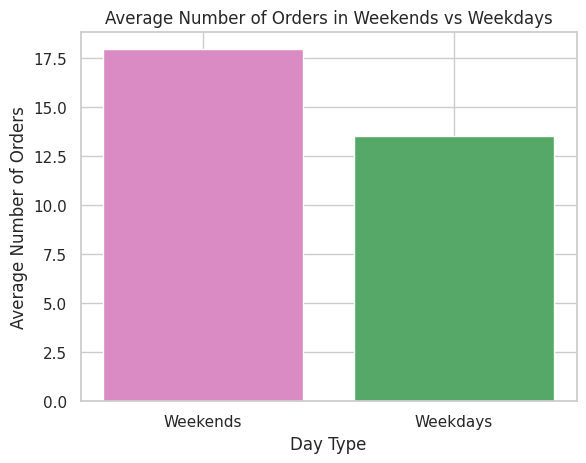

In [268]:
# Calculate average sale for holidays and non-holidays
avg_nb_orders_weekends = df_grouped[df_grouped['is_weekend']==1]['nb_orders'].mean()
avg_nb_orders_weekdays = df_grouped[df_grouped['is_weekend']==0]['nb_orders'].mean()
# Define colors for bars
colors = [sns.color_palette()[6], sns.color_palette()[2]]
# Plot a bar chart
plt.bar(['Weekends', 'Weekdays'], [avg_nb_orders_weekends, avg_nb_orders_weekdays],color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Number of Orders')
plt.title('Average Number of Orders in Weekends vs Weekdays')
plt.show()

In [240]:
t_score, p_value = stats.ttest_ind(a=df_grouped[(df_grouped["is_weekend"]==0)]["nb_orders"],b=df_grouped[(df_grouped["is_weekend"]==1)]["nb_orders"],equal_var=True)
print(f'p-value:{p_value}')

p-value:7.979896958755802e-30


### ***Since p-value < 5% level of segnificat, then we can regect the null hypothisis and say that there is  difference in the average of number of orders between Weekends and Weekdays. i.e  Weekends affect number of orders.***

# **Predective Analysis:**
**predict total sales (*m_cached_payed*) from avg *time spend* per order, number of orders, *number of customer* and is_weekend**

In [241]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df_grouped, x='time_spend_hours', y='m_cached_payed', title='Scatter Plot', labels={'time_spend_hours': 'X-axis', 'm_cached_payed': 'Y-axis'}, trendline='ols')

# Show the plot
fig.show()

In [242]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df_grouped, x='time_spend_hours', y='nb_orders', title='Scatter Plot', labels={'time_spend_hours': 'X-axis', 'nb_orders': 'Y-axis'}, trendline='ols')

# Show the plot
fig.show()

In [243]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df_grouped, x='is_weekend', y='m_cached_payed', title='Scatter Plot', labels={'is_weekend': 'X-axis', 'm_cached_payed': 'Y-axis'}, trendline='ols')

# Show the plot
fig.show()

In [244]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df_grouped, x='time_spend_hours', y='m_payed_per_customer', title='Scatter Plot', labels={'time_spend_hours': 'X-axis', 'm_payed_per_customer': 'Y-axis'})

# Show the plot
fig.show()

In [245]:
# Create a scatter plot matrix using Plotly Express
fig = px.scatter_matrix(df_grouped, dimensions=['time_spend_hours', 'm_cached_payed', 'm_nb_customer', 'nb_orders', 'm_payed_per_customer'],
                        title='Pair Plot', labels={'time_spend_hours': 'X-axis',
                                                    'm_cached_payed': 'Y-axis',
                                                    'm_nb_customer': 'Z-axis',
                                                    'nb_orders': 'W-axis',
                                                    'm_payed_per_customer': 'V-axis'})

# Show the plot
fig.show()

# **ML Moder: 1- Define X and y:**

In [246]:
# Features (independent variables) 2D array
X = df_grouped.drop(columns=["date_date","year","is_holidays","m_payed_per_customer","m_cached_payed"])
X.head()

,is_weekend,nb_orders,m_nb_customer,time_spend_hours
0,0,8,20,1.296597
1,0,9,25,0.915000
2,0,16,32,0.903056
3,0,21,50,1.060331
4,1,24,46,1.118044


In [247]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1362 entries, 0 to 1361
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_weekend        1362 non-null   int64  
 1   nb_orders         1362 non-null   int64  
 2   m_nb_customer     1362 non-null   int64  
 3   time_spend_hours  1362 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 53.2 KB


In [248]:
# Target (dependent variable) 1D arrat
y = df_grouped['m_cached_payed']
y

0        215.95
1        476.90
2        800.60
3       1036.30
4       1096.60
         ...   
1357     559.63
1358     671.65
1359     508.58
1360     322.05
1361    2843.05
Name: m_cached_payed, Length: 1362, dtype: float64

# **ML Moder: 2- Train-Test Split :**

In [249]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(953, 4)
(953,)
(409, 4)
(409,)


# **ML Moder: 3- prepare the data :**

*   Select the numerical columns and normalize them. Apply the transformation only on X_train.
*   List item

In [250]:
X_train.head(1)

,is_weekend,nb_orders,m_nb_customer,time_spend_hours
1189,0,15,39,3.348074


In [251]:
#preprocess the categorical column =is_weekend aka encode it

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe_values_train = ohe.fit_transform(X_train[['is_weekend']])
ohe_df_train = pd.DataFrame(ohe_values_train,
                            columns=ohe.get_feature_names_out())
ohe_df_train.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,is_weekend_0,is_weekend_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


Scaling numeric features: for ex: **Normalisation**

In [252]:
X_train_num =X_train.drop(columns="is_weekend")
X_train_num.head(1)

,nb_orders,m_nb_customer,time_spend_hours
1189,15,39,3.348074


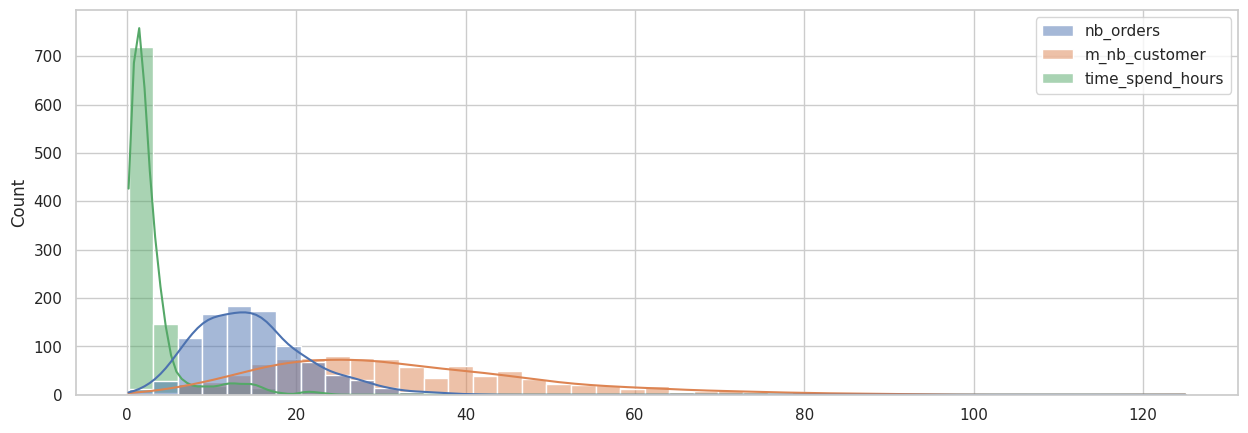

In [253]:
plt.figure(figsize=(15,5))
sns.histplot(X_train_num, kde=True)
plt.show()

In [254]:
#preprocess the numerical columns aka scale them
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

std_scaler = StandardScaler()
X_train_num_scaled = std_scaler.fit_transform(X_train[['nb_orders',
                                                       'm_nb_customer',
                                                       'time_spend_hours']])
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = std_scaler.get_feature_names_out())
X_train_num_scaled

,nb_orders,m_nb_customer,time_spend_hours
0,0.046295,0.368785,0.156676
1,2.017239,1.563592,-0.428006
2,-0.863372,-0.527320,-0.174553
3,-1.166594,-0.945502,-0.615716
4,-0.105316,-0.228618,-0.057235
...,...,...,...
948,-0.408539,-0.587060,-0.339922
949,-0.408539,-0.527320,0.223680
950,0.349517,0.249305,-0.193514
951,-1.318205,-1.184464,4.107774


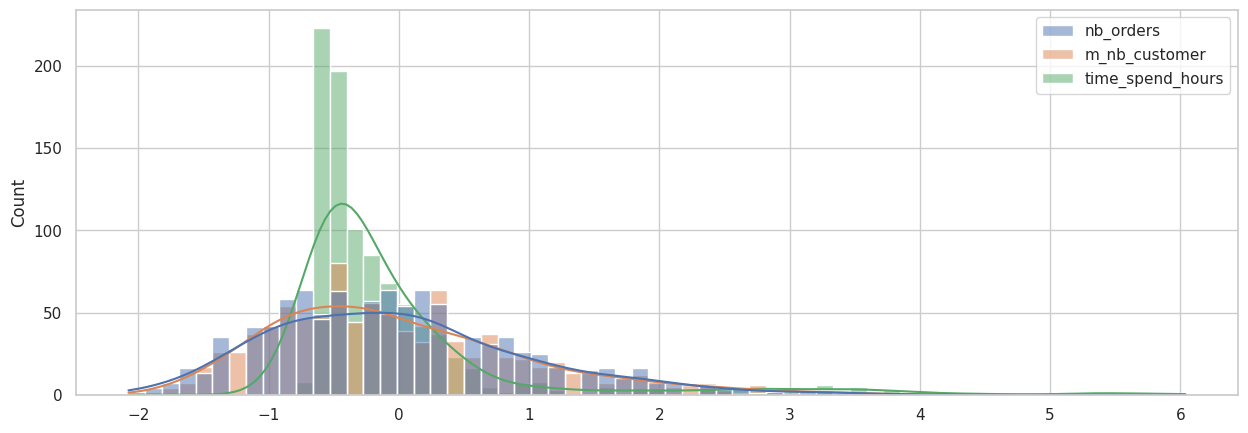

In [255]:
plt.figure(figsize=(15,5))
sns.histplot(X_train_num_scaled, kde=True)
plt.show()

In [256]:
#lets join the 2 preprocessed dfs

X_train_preproc = ohe_df_train.join(X_train_num_scaled, how="inner")
X_train_preproc

,is_weekend_0,is_weekend_1,nb_orders,m_nb_customer,time_spend_hours
0,1.0,0.0,0.046295,0.368785,0.156676
1,1.0,0.0,2.017239,1.563592,-0.428006
2,1.0,0.0,-0.863372,-0.527320,-0.174553
3,1.0,0.0,-1.166594,-0.945502,-0.615716
4,1.0,0.0,-0.105316,-0.228618,-0.057235
...,...,...,...,...,...
948,1.0,0.0,-0.408539,-0.587060,-0.339922
949,1.0,0.0,-0.408539,-0.527320,0.223680
950,1.0,0.0,0.349517,0.249305,-0.193514
951,1.0,0.0,-1.318205,-1.184464,4.107774


# **Fit the ML model**

In [257]:
from sklearn.linear_model import LinearRegression

model_da = LinearRegression()

#from sklearn.model_selection import cross_validate
#cross_validate(model_da, X_train_preproc, y_train, cv = 5)['test_score'].mean()

model_da.fit(X_train_preproc,y_train)

LinearRegression()

# **Scoring the model**

In [258]:
#transform the non-numerical data:
ohe_values_test = ohe.transform(X_test[['is_weekend']])
ohe_df_test = pd.DataFrame(ohe_values_test, columns=ohe.get_feature_names_out())
ohe_df_test

,is_weekend_0,is_weekend_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
404,0.0,1.0
405,1.0,0.0
406,0.0,1.0
407,0.0,1.0


In [259]:
# transforming the numerical data
X_test_num_scaled = std_scaler.transform(X_test[['nb_orders','m_nb_customer','time_spend_hours']])
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = std_scaler.get_feature_names_out())
X_test_num_scaled

,nb_orders,m_nb_customer,time_spend_hours
0,0.955961,0.488266,-0.567890
1,-0.105316,-0.228618,0.025549
2,-0.560150,-0.706541,0.389790
3,0.652739,0.548006,-0.480504
4,0.804350,0.309045,-0.153834
...,...,...,...
404,1.714017,2.638918,-0.139452
405,-1.469817,-0.945502,0.378652
406,-0.560150,-0.467579,0.609727
407,1.410795,1.145410,-0.095624


In [260]:
# Concatenating the data
X_test_preproc = ohe_df_test.join(X_test_num_scaled, how="inner")
X_test_preproc.head()

,is_weekend_0,is_weekend_1,nb_orders,m_nb_customer,time_spend_hours
0,1.0,0.0,0.955961,0.488266,-0.567890
1,1.0,0.0,-0.105316,-0.228618,0.025549
2,1.0,0.0,-0.560150,-0.706541,0.389790
3,1.0,0.0,0.652739,0.548006,-0.480504
4,1.0,0.0,0.804350,0.309045,-0.153834


In [261]:
#scoring the model
model_da.score(X_test_preproc,y_test)

0.8962157835378133

## **In general, the result implies that: our model is able to  translate 89.7% of the variance on the target i.e the model is able to correctly predict the outcome for 90% of the instances in our data**

# **Calculate the MAE**

Let's now calculate the mean absolute error of the model on the test set.

In [262]:
y_pred_da = model_da.predict(X_test_preproc)
print(y_pred_da.shape)
print(y_test.shape)

(409,)
(409,)


In [263]:
y_pred_da

array([ 894.,  636.,  458.,  920.,  820.,  726.,  652.,  472.,  780.,
        550., 1276.,  534.,  554.,  330., 1148.,  772., 1328., 1088.,
       1028.,  642.,  520.,  340.,  744.,  674.,  828.,  646.,  934.,
        642.,  902., 1398.,  346.,  810., 1042., 1312.,  878.,  822.,
        322.,  166., 2074.,  914.,  296.,  210.,  182.,  288., 1192.,
        332.,  700.,  982.,  650.,  416.,  488.,  834., 1380.,  896.,
        760.,  458., 1250.,  948.,  568.,  750., 1544., 1052.,  732.,
        570.,  218., 1978.,  640., 1022.,  418.,  556.,  682.,  354.,
        458.,  760.,  466.,  428., 1150., 1590.,  846.,  442.,  332.,
        988.,  414.,  558.,  622.,  264.,  640.,  840.,  534.,  288.,
        542., 2012.,  698.,  414.,  244.,  640.,  532.,  872.,  850.,
        608.,  310.,   80., 1110.,  146.,  270.,  520.,  514.,  554.,
        976.,  794.,  816.,  564., 1236.,  840.,  200., 1622.,  874.,
        816.,  850.,  960.,  686.,  808.,  964.,  766.,  720.,  602.,
        772.,  484.,

In [264]:
y_test.mean()

731.1028361858189

In [265]:
#mae using sklearn

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_sa = model_da.predict(X_test_preproc)

mean_absolute_error(y_test, y_pred_da)

#mean_squared_error(y_test, y_pred_da)

91.85682151589242